# **Airline Customer Value Analysis**

**About the dataset:**</br>
The data set belongs to a popular airline company. This company wants to know the segmentation of their customer, so accordingly they can have the best treatment for the business.

# **1. Data Overview**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
plt.rcParams["patch.force_edgecolor"] = True
%matplotlib inline
from matplotlib import rcParams

rcParams['figure.figsize'] = 12, 5
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

df = pd.read_csv('flight.csv')
df.head()

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
0,54993,11/2/2006,12/24/2008,Male,6,.,beijing,CN,31.0,3/31/2014,...,234188.0,580717,3/31/2014,1,3.483254,18,34,0.961639,619760,50
1,28065,2/19/2007,8/3/2007,Male,6,NaN,beijing,CN,42.0,3/31/2014,...,167434.0,293678,3/25/2014,7,5.194245,17,29,1.252314,415768,33
2,55106,2/1/2007,8/30/2007,Male,6,.,beijing,CN,40.0,3/31/2014,...,164982.0,283712,3/21/2014,11,5.298507,18,20,1.254676,406361,26
3,21189,8/22/2008,8/23/2008,Male,5,Los Angeles,CA,US,64.0,3/31/2014,...,125500.0,281336,12/26/2013,97,27.863636,73,11,1.090870,372204,12
4,39546,4/10/2009,4/15/2009,Male,6,guiyang,guizhou,CN,48.0,3/31/2014,...,130702.0,309928,3/27/2014,5,4.788079,47,27,0.970658,338813,39


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62988 entries, 0 to 62987
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MEMBER_NO          62988 non-null  int64  
 1   FFP_DATE           62988 non-null  object 
 2   FIRST_FLIGHT_DATE  62988 non-null  object 
 3   GENDER             62985 non-null  object 
 4   FFP_TIER           62988 non-null  int64  
 5   WORK_CITY          60719 non-null  object 
 6   WORK_PROVINCE      59740 non-null  object 
 7   WORK_COUNTRY       62962 non-null  object 
 8   AGE                62568 non-null  float64
 9   LOAD_TIME          62988 non-null  object 
 10  FLIGHT_COUNT       62988 non-null  int64  
 11  BP_SUM             62988 non-null  int64  
 12  SUM_YR_1           62437 non-null  float64
 13  SUM_YR_2           62850 non-null  float64
 14  SEG_KM_SUM         62988 non-null  int64  
 15  LAST_FLIGHT_DATE   62988 non-null  object 
 16  LAST_TO_END        629

In [3]:
# Add 'year' columns for "FFP_DATE", "FIRST_FLIGHT_DATE", "LOAD_TIME", "LAST_FLIGHT_DATE"

#df_year = df.copy()
df['FFP_DATE_YEAR'] = df['FFP_DATE'].str[-4:]
df['FIRST_FLIGHT_DATE_YEAR'] = df['FIRST_FLIGHT_DATE'].str[-4:]
df['LAST_FLIGHT_DATE_YEAR'] = df['LAST_FLIGHT_DATE'].str[-4:]

In [4]:
df.head()

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight,FFP_DATE_YEAR,FIRST_FLIGHT_DATE_YEAR,LAST_FLIGHT_DATE_YEAR
0,54993,11/2/2006,12/24/2008,Male,6,.,beijing,CN,31.0,3/31/2014,...,1,3.483254,18,34,0.961639,619760,50,2006,2008,2014
1,28065,2/19/2007,8/3/2007,Male,6,NaN,beijing,CN,42.0,3/31/2014,...,7,5.194245,17,29,1.252314,415768,33,2007,2007,2014
2,55106,2/1/2007,8/30/2007,Male,6,.,beijing,CN,40.0,3/31/2014,...,11,5.298507,18,20,1.254676,406361,26,2007,2007,2014
3,21189,8/22/2008,8/23/2008,Male,5,Los Angeles,CA,US,64.0,3/31/2014,...,97,27.863636,73,11,1.090870,372204,12,2008,2008,2013
4,39546,4/10/2009,4/15/2009,Male,6,guiyang,guizhou,CN,48.0,3/31/2014,...,5,4.788079,47,27,0.970658,338813,39,2009,2009,2014


In [5]:
df['FFP_TIER'] = df['FFP_TIER'].astype('object')

In [6]:
# Check unusual value in column LAST_FLIGHT_DATE
df['LAST_FLIGHT_DATE'][df['LAST_FLIGHT_DATE'].str.contains('^2014|00$')].head()

248     2014/2/29  0:00:00
447     2014/2/29  0:00:00
473     2014/2/29  0:00:00
832     2014/2/29  0:00:00
1051    2014/2/29  0:00:00
Name: LAST_FLIGHT_DATE, dtype: object

In [7]:
# Transform Date Format from '2014/2/29  0:00:00' to '2/29/2014'
df['LAST_FLIGHT_DATE'].replace('2014/2/29  0:00:00','2/29/2014',inplace=True)

In [8]:
# Transform DataType 'FFP_DATE','FIRST_FLIGHT_DATE','LOAD_TIME','LAST_FLIGHT_DATE'
df['FFP_DATE'] = pd.to_datetime(df['FFP_DATE'],errors='coerce')
df['LOAD_TIME'] = pd.to_datetime(df['LOAD_TIME'],errors='coerce')
df['FIRST_FLIGHT_DATE'] = pd.to_datetime(df['FIRST_FLIGHT_DATE'],errors='coerce')
df['LAST_FLIGHT_DATE'] = pd.to_datetime(df['LAST_FLIGHT_DATE'],errors='coerce')

In [9]:
# Recheck DataType
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62988 entries, 0 to 62987
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   MEMBER_NO               62988 non-null  int64         
 1   FFP_DATE                62988 non-null  datetime64[ns]
 2   FIRST_FLIGHT_DATE       62988 non-null  datetime64[ns]
 3   GENDER                  62985 non-null  object        
 4   FFP_TIER                62988 non-null  object        
 5   WORK_CITY               60719 non-null  object        
 6   WORK_PROVINCE           59740 non-null  object        
 7   WORK_COUNTRY            62962 non-null  object        
 8   AGE                     62568 non-null  float64       
 9   LOAD_TIME               62988 non-null  datetime64[ns]
 10  FLIGHT_COUNT            62988 non-null  int64         
 11  BP_SUM                  62988 non-null  int64         
 12  SUM_YR_1                62437 non-null  float6

- There is 62988 rows
- Column DataType has been transfomred 
- There are missing values in categorical column `WORK_CITY`,`WORK_PROVINCE`, and`WORK_COUNTRY` while in numerical column `SUM_Y_1`,`AGE` and `SUM_YR_2`

In [10]:
nums = ['AGE','FLIGHT_COUNT','BP_SUM','SUM_YR_1','SUM_YR_2',
        'SEG_KM_SUM','LAST_TO_END','AVG_INTERVAL','MAX_INTERVAL','EXCHANGE_COUNT',
        'avg_discount','Points_Sum','Point_NotFlight']
cats = ['FFP_TIER','FFP_DATE_YEAR','FIRST_FLIGHT_DATE_YEAR',
        'GENDER','WORK_CITY','WORK_PROVINCE','WORK_COUNTRY','LAST_FLIGHT_DATE_YEAR']
date = ['FFP_DATE','FIRST_FLIGHT_DATE','LOAD_TIME','LAST_FLIGHT_DATE']

In [11]:
print('='*120)

**Statistical Summary**

In [12]:
df[nums].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
AGE,62568.0,42.476346,9.885915,6.0,35.000000,41.000000,48.000000,110.0
FLIGHT_COUNT,62988.0,11.839414,14.049471,2.0,3.000000,7.000000,15.000000,213.0
BP_SUM,62988.0,10925.081254,16339.486151,0.0,2518.000000,5700.000000,12831.000000,505308.0
SUM_YR_1,62437.0,5355.376064,8109.450147,0.0,1003.000000,2800.000000,6574.000000,239560.0
SUM_YR_2,62850.0,5604.026014,8703.364247,0.0,780.000000,2773.000000,6845.750000,234188.0
SEG_KM_SUM,62988.0,17123.878691,20960.844623,368.0,4747.000000,9994.000000,21271.250000,580717.0
LAST_TO_END,62988.0,176.120102,183.822223,1.0,29.000000,108.000000,268.000000,731.0
AVG_INTERVAL,62988.0,67.749788,77.517866,0.0,23.370370,44.666667,82.000000,728.0
MAX_INTERVAL,62988.0,166.033895,123.397180,0.0,79.000000,143.000000,228.000000,728.0
EXCHANGE_COUNT,62988.0,0.319775,1.136004,0.0,0.000000,0.000000,0.000000,46.0


1. Normal distribution based on mean median:
   - `avg_discount`
   - `EXCHANGE_COUNT`
2. Skewed distribution:
   - `AGE`
   - `FLIGHT_COUNT`
   - `BP_SUM`
   - `SUM_YR_1`
   - `SUM_YR_2`
   - `SEG_KM_SUM`
   - `LAST_TO_END`
   - `AVG_INTERVAL`
   - `MAX_INTERVAL`
   - `Points_Sum`

In [13]:
df[cats].describe().transpose()

,count,unique,top,freq
FFP_TIER,62988,3,4,58066
FFP_DATE_YEAR,62988,10,2012,14598
FIRST_FLIGHT_DATE_YEAR,62988,13,2012,15552
GENDER,62985,2,Male,48134
WORK_CITY,60719,3234,guangzhou,9386
WORK_PROVINCE,59740,1165,guangdong,17509
WORK_COUNTRY,62962,118,CN,57748
LAST_FLIGHT_DATE_YEAR,62988,4,2014,28599


In [14]:
for col in cats:
    print(f'''Value count column {col}:''')
    print(df[col].value_counts())
    print('---'*10, '\n')

Value count kolom FFP_TIER:
4    58066
5     3409
6     1513
Name: FFP_TIER, dtype: int64
------------------------------ 

Value count kolom FFP_DATE_YEAR:
2012    14598
2011    10708
2010     7648
2008     6556
2007     5865
2009     5653
2006     4555
2013     3992
2005     3078
2004      335
Name: FFP_DATE_YEAR, dtype: int64
------------------------------ 

Value count kolom FIRST_FLIGHT_DATE_YEAR:
2012    15552
2011    10407
2013     7911
2010     7333
2009     5361
2008     5347
2007     4684
2006     3478
2005     2360
2014      467
2004       82
2015        4
1905        2
Name: FIRST_FLIGHT_DATE_YEAR, dtype: int64
------------------------------ 

Value count kolom GENDER:
Male      48134
Female    14851
Name: GENDER, dtype: int64
------------------------------ 

Value count kolom WORK_CITY:
guangzhou     9386
beijing       7845
shanghai      5001
shenzhen      3605
dalian        1979
              ... 
stratford        1
KATO-GUN         1
AOMORI-SHI       1
NORTH YORK       1


In [15]:
df[date].describe().transpose()

,count,unique,top,freq,first,last
FFP_DATE,62988,3068,2011-01-13,184,2004-11-01,2013-03-31
FIRST_FLIGHT_DATE,62988,3406,2013-02-16,96,1905-12-31,2015-05-30
LOAD_TIME,62988,1,2014-03-31,62988,2014-03-31,2014-03-31
LAST_FLIGHT_DATE,62567,730,2014-03-31,959,2012-04-01,2014-03-31


- It consisdered to drop columns that contain a large number of unique values, following: 
`MEMBER_NO`, `FFP_DATE`, `FIRST_FLIGHT_DATE`, `WORK_CITY`, `WORK_PROVINCE`, `WORK_COUNTRY`, `LAST_FLIGHT_DATE`

- The other option is to reduce the unique values in the feature engineering stage.

In [16]:
df.columns

Index(['MEMBER_NO', 'FFP_DATE', 'FIRST_FLIGHT_DATE', 'GENDER', 'FFP_TIER',
       'WORK_CITY', 'WORK_PROVINCE', 'WORK_COUNTRY', 'AGE', 'LOAD_TIME',
       'FLIGHT_COUNT', 'BP_SUM', 'SUM_YR_1', 'SUM_YR_2', 'SEG_KM_SUM',
       'LAST_FLIGHT_DATE', 'LAST_TO_END', 'AVG_INTERVAL', 'MAX_INTERVAL',
       'EXCHANGE_COUNT', 'avg_discount', 'Points_Sum', 'Point_NotFlight',
       'FFP_DATE_YEAR', 'FIRST_FLIGHT_DATE_YEAR', 'LAST_FLIGHT_DATE_YEAR'],
      dtype='object')

# **2. Data Cleaning**

## a. Handling Missing Values

In [17]:
df.isna().sum()

MEMBER_NO                    0
FFP_DATE                     0
FIRST_FLIGHT_DATE            0
GENDER                       3
FFP_TIER                     0
WORK_CITY                 2269
WORK_PROVINCE             3248
WORK_COUNTRY                26
AGE                        420
LOAD_TIME                    0
FLIGHT_COUNT                 0
BP_SUM                       0
SUM_YR_1                   551
SUM_YR_2                   138
SEG_KM_SUM                   0
LAST_FLIGHT_DATE           421
LAST_TO_END                  0
AVG_INTERVAL                 0
MAX_INTERVAL                 0
EXCHANGE_COUNT               0
avg_discount                 0
Points_Sum                   0
Point_NotFlight              0
FFP_DATE_YEAR                0
FIRST_FLIGHT_DATE_YEAR       0
LAST_FLIGHT_DATE_YEAR        0
dtype: int64

In [31]:
# Check Null Value
total = df.isnull().sum().sort_values(ascending=False)
percent = round(df.isnull().sum()/df.isnull().count()*100,2).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data[missing_data['Percent']>0]

,Total,Percent
WORK_PROVINCE,3248,5.16
WORK_CITY,2269,3.60
SUM_YR_1,551,0.87
LAST_FLIGHT_DATE,421,0.67
AGE,420,0.67
SUM_YR_2,138,0.22
WORK_COUNTRY,26,0.04


**Imputation of Columns containing missing value**

In [18]:
# Numerical
df['AGE'].fillna(df['AGE'].median(),inplace=True)
df['SUM_YR_1'].fillna(df['SUM_YR_1'].median(),inplace=True)
df['SUM_YR_2'].fillna(df['SUM_YR_2'].median(),inplace=True)

# Categorical
df['GENDER'].fillna('Male',inplace=True)
df['LAST_FLIGHT_DATE'].fillna('2014-03-31',inplace=True)

# Columns containing a large missing value WORK_CITY, WORK_PROVINCE, and WORK_COUNTRY need to be droped
df.drop(columns=['WORK_CITY','WORK_PROVINCE','WORK_COUNTRY'], inplace=True)

# Drop 0:00 pada LAST_FLIGHT_DATE_YEAR
df['LAST_FLIGHT_DATE_YEAR'].drop(columns='0,00',inplace=True)

In [19]:
# Recheck columns
df.isna().sum()

MEMBER_NO                 0
FFP_DATE                  0
FIRST_FLIGHT_DATE         0
GENDER                    0
FFP_TIER                  0
AGE                       0
LOAD_TIME                 0
FLIGHT_COUNT              0
BP_SUM                    0
SUM_YR_1                  0
SUM_YR_2                  0
SEG_KM_SUM                0
LAST_FLIGHT_DATE          0
LAST_TO_END               0
AVG_INTERVAL              0
MAX_INTERVAL              0
EXCHANGE_COUNT            0
avg_discount              0
Points_Sum                0
Point_NotFlight           0
FFP_DATE_YEAR             0
FIRST_FLIGHT_DATE_YEAR    0
LAST_FLIGHT_DATE_YEAR     0
dtype: int64

## b. Handling Duplicated Data (if any)

In [20]:
# Check Duplicated Value
df.duplicated().sum()

0

# **3. Exploratory Data Analysis**

## **a. Univariate Analysis**

**Visualization Numerical Data Feature**

In [21]:
nums1 = ['AGE','FLIGHT_COUNT','BP_SUM','SUM_YR_1','SUM_YR_2',
        'SEG_KM_SUM','LAST_TO_END','AVG_INTERVAL','MAX_INTERVAL','EXCHANGE_COUNT',
        'avg_discount','Points_Sum','Point_NotFlight']

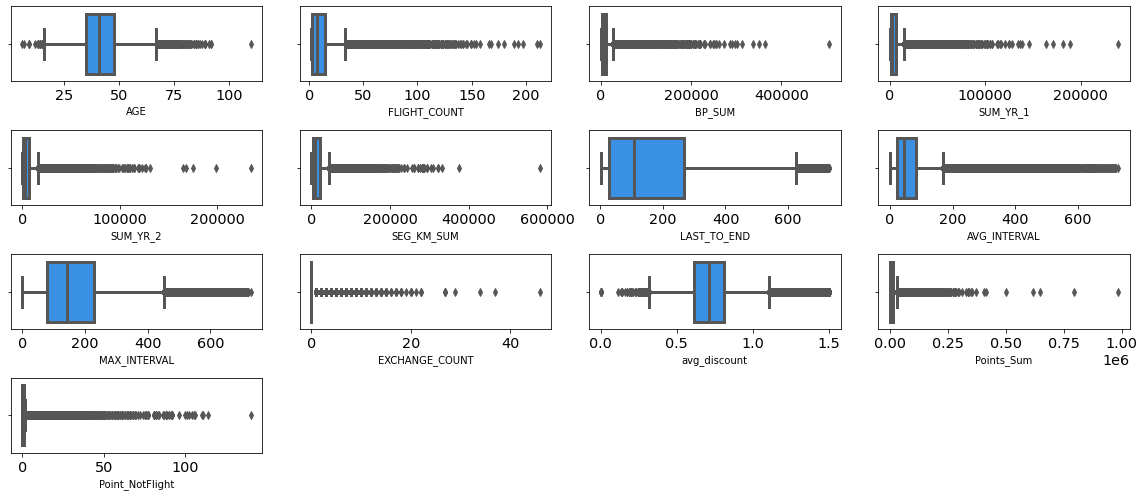

In [24]:
# Boxplot
plt.figure(figsize=(16, 7))
for i in range(0, len(nums1)):
    plt.subplot(4, 4, i+1)
    sns.boxplot(x=df[nums1[i]], color='dodgerblue')
    plt.xlabel(nums1[i])
    plt.tight_layout()

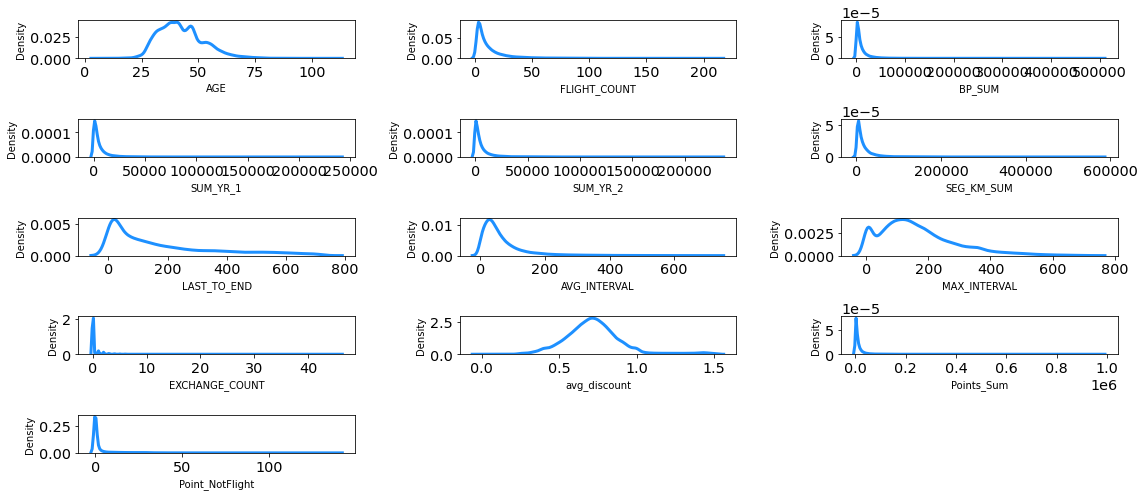

In [23]:
# Displot
plt.figure(figsize=(16, 7))
for i in range(0, len(nums)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x=df[nums1[i]], color='dodgerblue')
    plt.xlabel(nums1[i])
    plt.tight_layout()

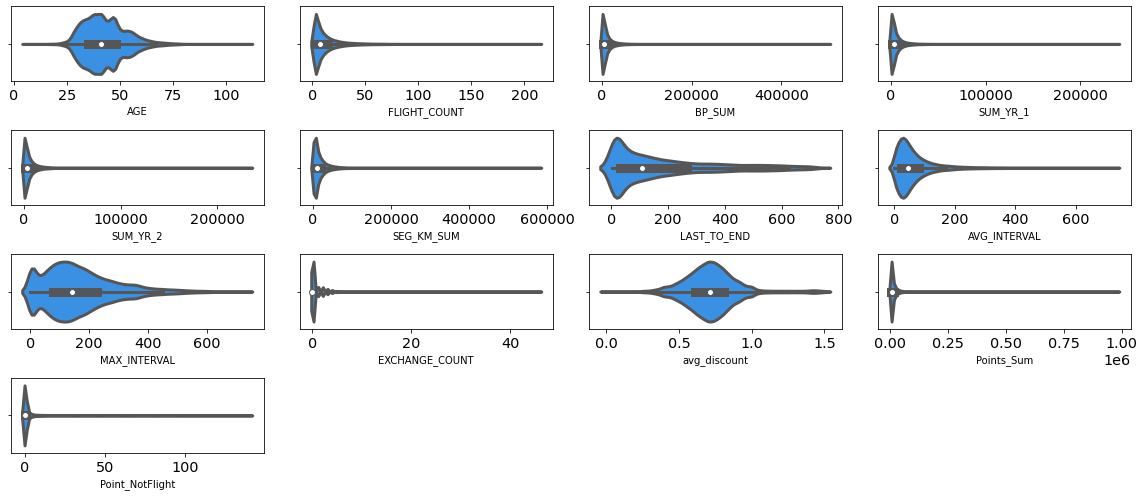

In [31]:
# Violin plot

plt.figure(figsize=(16, 7))
for i in range(0, len(nums1)):
    plt.subplot(4, 4, i+1)
    sns.violinplot(x=df[nums1[i]], color='dodgerblue')
    plt.xlabel(nums1[i])
    plt.tight_layout()

- Outliers exist in almost every columns
- Normal distribution in column `AGE` and `avg_discount`

**Plot for Categorical Data**

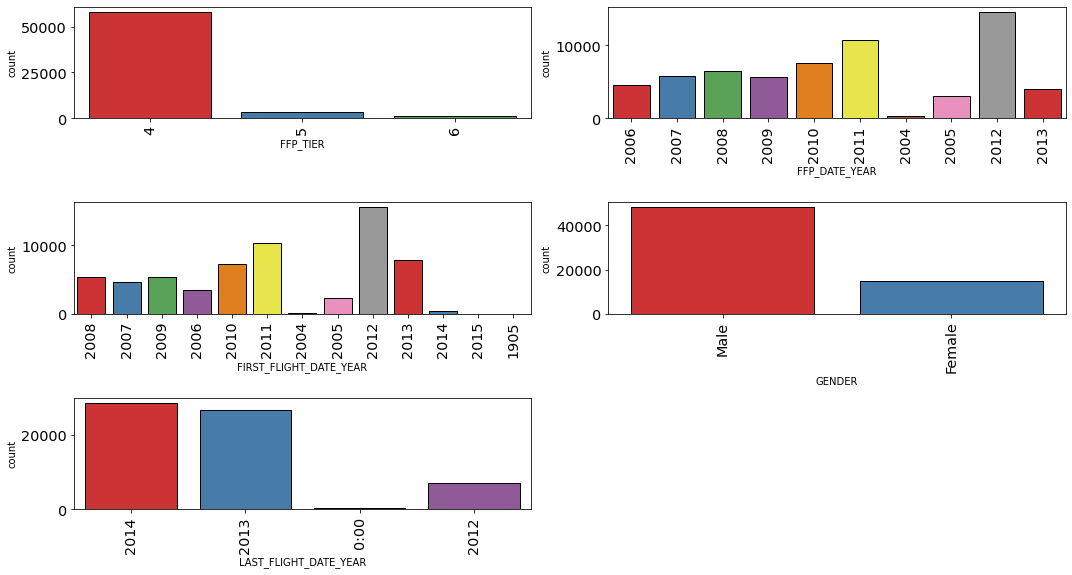

In [32]:
cats2 = ['FFP_TIER','FFP_DATE_YEAR','FIRST_FLIGHT_DATE_YEAR','GENDER','LAST_FLIGHT_DATE_YEAR']

features = cats2
plt.figure(figsize=(15,10))
for i in range(0, len(features)):
    plt.subplot(4,2, i+1) 
    sns.countplot(data=df, x=features[i], palette='Set1')
    plt.xticks(rotation=90)
    plt.xlabel(features[i])
    plt.tight_layout()


## **b. Bivariate Analysis**

In [33]:
df.corr()

,MEMBER_NO,AGE,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
MEMBER_NO,1.000000,0.001256,-0.000276,0.000063,-0.002521,0.001063,-0.000032,-0.002588,0.002479,0.004761,-0.003844,0.001727,-0.003613,-0.033204
AGE,0.001256,1.000000,0.073346,0.100311,0.111728,0.083396,0.087215,-0.025641,-0.024549,0.009412,0.029754,0.132520,0.074719,-0.091930
FLIGHT_COUNT,-0.000276,0.073346,1.000000,0.788379,0.748021,0.794826,0.850411,-0.404999,-0.316833,-0.188682,0.502501,0.139377,0.747092,0.291880
BP_SUM,0.000063,0.100311,0.788379,1.000000,0.850578,0.884615,0.921724,-0.319039,-0.246764,-0.147953,0.530021,0.307245,0.923271,0.244254
SUM_YR_1,-0.002521,0.111728,0.748021,0.850578,1.000000,0.663372,0.804000,-0.188062,-0.241224,-0.141591,0.487949,0.267536,0.788412,0.235214
SUM_YR_2,0.001063,0.083396,0.794826,0.884615,0.663372,1.000000,0.849146,-0.423440,-0.245716,-0.153893,0.468233,0.234381,0.826689,0.238026
SEG_KM_SUM,-0.000032,0.087215,0.850411,0.921724,0.804000,0.849146,1.000000,-0.369509,-0.280746,-0.155508,0.507819,0.108393,0.853014,0.259037
LAST_TO_END,-0.002588,-0.025641,-0.404999,-0.319039,-0.188062,-0.423440,-0.369509,1.000000,-0.108594,-0.343939,-0.169717,-0.021036,-0.292027,-0.124074
AVG_INTERVAL,0.002479,-0.024549,-0.316833,-0.246764,-0.241224,-0.245716,-0.280746,-0.108594,1.000000,0.724392,-0.130226,-0.038814,-0.220946,-0.075967
MAX_INTERVAL,0.004761,0.009412,-0.188682,-0.147953,-0.141591,-0.153893,-0.155508,-0.343939,0.724392,1.000000,-0.089417,-0.016392,-0.135977,-0.042843


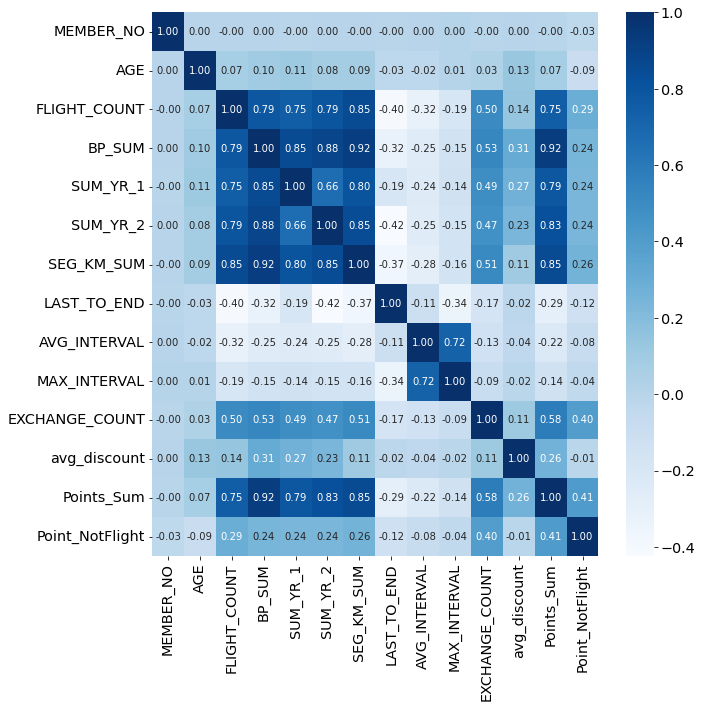

In [34]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), cmap='Blues', annot=True, fmt='.2f')
plt.show()

Strong correlation (> 0.5):
   - column `FLIGHT_COUNT` with `BP_SUM`, `SUM_YR_1`, `SUM_YR_2`, `SEG_KM_SUM`, `EXCHANGE_COUNT`, `Points_Sum`.
   - column `BP_SUM` with `SUM_YR_1`, `SUM_YR_2`, `SEG_KM_SUM`,  `EXCHANGE_COUNT`, `Points_Sum`.
   - `SUM_YR_1` with `SUM_YR_2`, `SEG_KM_SUM`, `Points_Sum`
   - `SUM_YR_2` with `SEG_KM_SUM`, `Points_Sum`.
   - `SEG_KM_SUM` with `Points_Sum`.
   - `AVG_INTERVAL` with `MAX_INTERVAL`. 
   - `EXCHANGE_COUNT` with `Points_Sum` 

# **4. Data Preprocessing**

## a. Feature Selection

In [35]:
df.columns

Index(['MEMBER_NO', 'FFP_DATE', 'FIRST_FLIGHT_DATE', 'GENDER', 'FFP_TIER',
       'AGE', 'LOAD_TIME', 'FLIGHT_COUNT', 'BP_SUM', 'SUM_YR_1', 'SUM_YR_2',
       'SEG_KM_SUM', 'LAST_FLIGHT_DATE', 'LAST_TO_END', 'AVG_INTERVAL',
       'MAX_INTERVAL', 'EXCHANGE_COUNT', 'avg_discount', 'Points_Sum',
       'Point_NotFlight', 'FFP_DATE_YEAR', 'FIRST_FLIGHT_DATE_YEAR',
       'LAST_FLIGHT_DATE_YEAR'],
      dtype='object')

## b. Feature Engineering

In [36]:
# new columns 'subs_period' : membershipp period from FFP_DATE to LOAD_TIME
df['subs_period'] = (pd.to_datetime(df['LOAD_TIME']).dt.year - pd.to_datetime(df['FFP_DATE']).dt.year) * 12 + (pd.to_datetime(df['LOAD_TIME']).dt.month - pd.to_datetime(df['FFP_DATE']).dt.month)

In [37]:
df.head(3)

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,AGE,LOAD_TIME,FLIGHT_COUNT,BP_SUM,SUM_YR_1,...,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight,FFP_DATE_YEAR,FIRST_FLIGHT_DATE_YEAR,LAST_FLIGHT_DATE_YEAR,subs_period
0,54993,2006-11-02,2008-12-24,Male,6,31.0,2014-03-31,210,505308,239560.0,...,3.483254,18,34,0.961639,619760,50,2006,2008,2014,88
1,28065,2007-02-19,2007-08-03,Male,6,42.0,2014-03-31,140,362480,171483.0,...,5.194245,17,29,1.252314,415768,33,2007,2007,2014,85
2,55106,2007-02-01,2007-08-30,Male,6,40.0,2014-03-31,135,351159,163618.0,...,5.298507,18,20,1.254676,406361,26,2007,2007,2014,85


**Kemungkinan pemilihan fitur berdasarkan**<br>
RFM model : <br>
- R (Recency - Kebaruan): Kapan terakhir kali member melakukan perjalanan?
- F (Frequency - Frekuensi): Berapa kali member melakukan perjalanan?
- M (Monetary - Nilai Moneter): Berapa banyak uang yang sudah dihabiskan member?

Feature selection :<br>
- R = 'LOAD_TIME'-'LAST_FLIGHT_DATE'
- F = 'FLIGHT_COUNT'
- M = 'SUM_YR_1'

In [127]:
df_selected = df[['LAST_TO_END','FLIGHT_COUNT','SUM_YR_1']]
df_selected = df_selected[df_selected['SUM_YR_1']>0]
print('Jumlah baris df_selected = ',df_selected.shape[0])
df_selected.head()

Jumlah baris df_selected =  53073


,LAST_TO_END,FLIGHT_COUNT,SUM_YR_1
0,1,210,239560.0
1,7,140,171483.0
2,11,135,163618.0
3,97,23,116350.0
4,5,152,124560.0


## c. Handling Outliers

In [128]:
 nums_selected = ['LAST_TO_END','FLIGHT_COUNT','SUM_YR_1']

In [129]:
# Remove Outliers
print(f'# Row before handling outliers: {len(df_selected)}')

filtered_entries = np.array([True] * len(df_selected))
for col in df_selected.columns:
    Q1 = df_selected[col].quantile(0.25)
    Q3 = df_selected[col].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - (IQR * 1.5)
    high_limit = Q3 + (IQR * 1.5)

    filtered_entries = ((df_selected[col] >= low_limit) & (df_selected[col] <= high_limit)) & filtered_entries
    
df_clean_IQR = df_selected[filtered_entries]

print(f'# Row after handling outliers: {len(df_clean_IQR)}')

# Row before handling outliers: 53073
# Row after handling outliers: 47241


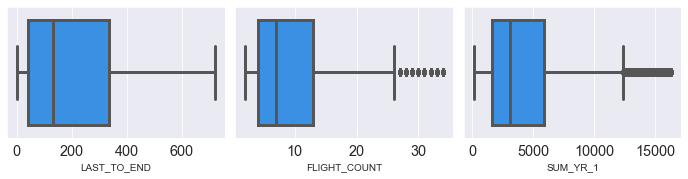

In [130]:
plt.figure(figsize=(16, 7))
for i in range(0, len(nums_selected)):
    plt.subplot(3, 5, i+1)
    sns.boxplot(x=df_clean_IQR[nums_selected[i]], color='dodgerblue')
    plt.xlabel(nums_selected[i])
    plt.tight_layout()

## d. Transform

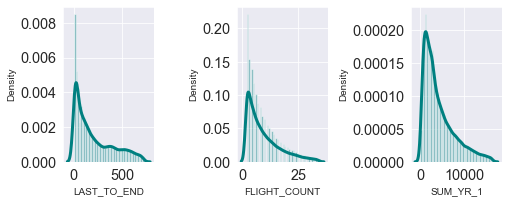

In [131]:
# Recheck distribution
plt.figure(figsize=(12, 8))
for i in range(0, len(nums_selected)):
    sns.set_style('darkgrid')
    plt.subplot(3, 5, i+1)
    sns.distplot(x=df_clean_IQR[nums_selected[i]], color='teal')
    plt.xlabel(nums_selected[i])
    plt.tight_layout();

In [132]:
df_clean_IQR.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
LAST_TO_END,47241.0,203.782922,195.565600,1.0,39.0,132.0,337.0,721.0
FLIGHT_COUNT,47241.0,9.371965,7.343037,2.0,4.0,7.0,13.0,34.0
SUM_YR_1,47241.0,4247.718704,3464.510251,108.0,1616.0,3100.0,5924.0,16326.0


In [133]:
df0 = df_clean_IQR.copy()

**Skewed:** <br>
`LAST_TO_END` <br>
`FLIGHT_COUNT` <br>
`SUM_YR_1` <br>

In [134]:
skewed = ['LAST_TO_END', 'FLIGHT_COUNT', 'SUM_YR_1']

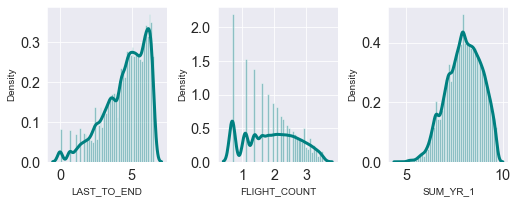

In [135]:
# Check distribution after log trasform for column ['subs_period','LAST_TO_END', 'FLIGHT_COUNT', 'SEG_KM_SUM']
plt.figure(figsize=(12, 8))
for i in range(0, len(skewed)):
    sns.set_style('darkgrid')
    plt.subplot(3, 5, i+1)
    logt = np.log(df_clean_IQR[skewed[i]])
    sns.distplot(x=logt, color='teal')
    plt.xlabel(skewed[i])
    plt.tight_layout()

    #Log Trasformation
    df_clean_IQR['log_'+str(skewed[i])] = logt
    df_clean_IQR = df_clean_IQR.drop(columns=skewed[i])

In [136]:
df_clean_IQR.describe().transpose()[-3:]

,count,mean,std,min,25%,50%,75%,max
log_LAST_TO_END,47241.0,4.591891,1.480643,0.000000,3.663562,4.882802,5.820083,6.580639
log_FLIGHT_COUNT,47241.0,1.932471,0.800472,0.693147,1.386294,1.945910,2.564949,3.526361
log_SUM_YR_1,47241.0,8.005815,0.883291,4.682131,7.387709,8.039157,8.686767,9.700514


**Normalization/Standardization**

In [138]:
df_clean_IQR.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
log_LAST_TO_END,47241.0,4.591891,1.480643,0.000000,3.663562,4.882802,5.820083,6.580639
log_FLIGHT_COUNT,47241.0,1.932471,0.800472,0.693147,1.386294,1.945910,2.564949,3.526361
log_SUM_YR_1,47241.0,8.005815,0.883291,4.682131,7.387709,8.039157,8.686767,9.700514


In [139]:
to_std = ['log_LAST_TO_END','log_FLIGHT_COUNT','log_SUM_YR_1']

In [140]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

for i in range(0,len(to_std)):
  df_clean_IQR[to_std[i]] = StandardScaler().fit_transform(df_clean_IQR[to_std[i]].values.reshape(len(df_clean_IQR), 1))

In [141]:
df_clean_IQR.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
log_LAST_TO_END,47241.0,2.826708e-14,1.000011,-3.101314,-0.626984,0.196478,0.829508,1.343180
log_FLIGHT_COUNT,47241.0,1.489255e-13,1.000011,-1.548258,-0.682326,0.016789,0.790140,1.991208
log_SUM_YR_1,47241.0,-6.119511e-16,1.000011,-3.762881,-0.699783,0.037749,0.770935,1.918640


# 5. Modeling

In [142]:
df_cluster = df_clean_IQR.copy()

In [143]:
df_cluster.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47241 entries, 94 to 62987
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   log_LAST_TO_END   47241 non-null  float64
 1   log_FLIGHT_COUNT  47241 non-null  float64
 2   log_SUM_YR_1      47241 non-null  float64
dtypes: float64(3)
memory usage: 1.4 MB


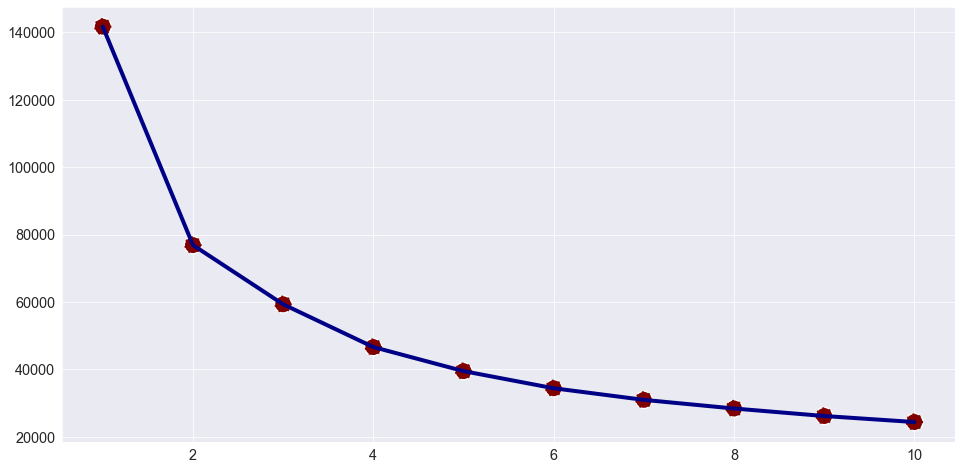

In [144]:
from sklearn.cluster import KMeans
inertia = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(df_cluster)
    inertia.append(kmeans.inertia_)



plt.figure(figsize=(16, 8))
# plt.plot(inertia)

sns.lineplot(x=range(1, 11), y=inertia, color='#000087', linewidth = 4)
sns.scatterplot(x=range(1, 11), y=inertia, s=300, color='#800000',  linestyle='--');

In [145]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(df_cluster.values)

KMeans(n_clusters=3, random_state=0)

In [146]:
df_data_std = pd.DataFrame(data=df_cluster, columns=list(df_cluster))

In [147]:
df_data_std['Cluster'] = kmeans.labels_
df0['Cluster'] = kmeans.labels_

In [148]:
df_data_std.head()

,log_LAST_TO_END,log_FLIGHT_COUNT,log_SUM_YR_1,Cluster
94,-0.419821,0.690144,1.616324,0
127,-0.983635,1.196682,1.029512,1
201,-0.804182,1.049539,1.789809,1
261,-1.617332,1.049539,1.625345,1
362,-1.318923,1.502908,1.600913,1


In [149]:
df0.head()

,LAST_TO_END,FLIGHT_COUNT,SUM_YR_1,Cluster
94,53,12,12500.0,0
127,23,18,7444.0,1
201,30,16,14570.0,1
261,9,16,12600.0,1
362,14,23,12331.0,1


In [150]:
# Value Counting of Each Categorical-type Column
for col in ['Cluster']:
    print(f'''Value count column {col}:''')
    print(df0[col].value_counts())
    print('---'*10, '\n')

Value count column Cluster:
2    20185
0    15684
1    11372
Name: Cluster, dtype: int64
------------------------------ 



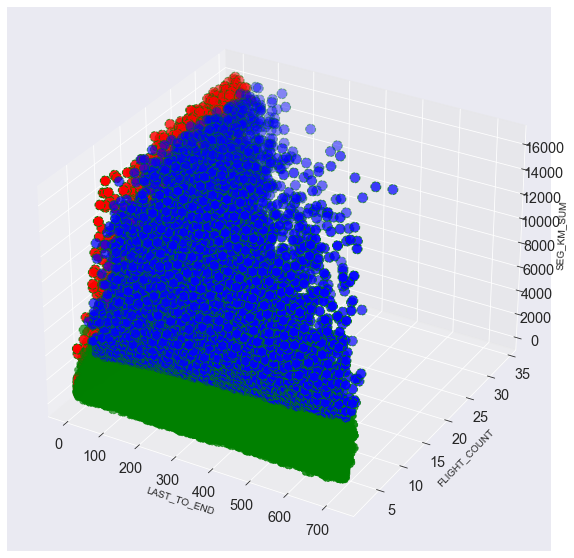

In [155]:
# Case 2 with 3 feature
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df0.LAST_TO_END[df0.Cluster == 0], df0["FLIGHT_COUNT"][df0.Cluster == 0], df0["SUM_YR_1"][df0.Cluster == 0], c='blue', s=100, edgecolor='green',linestyle='--')
ax.scatter(df0.LAST_TO_END[df0.Cluster == 1], df0["FLIGHT_COUNT"][df0.Cluster == 1], df0["SUM_YR_1"][df0.Cluster == 1], c='red', s=100, edgecolor='green',linestyle='--')
ax.scatter(df0.LAST_TO_END[df0.Cluster == 2], df0["FLIGHT_COUNT"][df0.Cluster == 2], df0["SUM_YR_1"][df0.Cluster == 2], c='green', s=100, edgecolor='green',linestyle='--')
ax.scatter(df0.LAST_TO_END[df0.Cluster == 3], df0["FLIGHT_COUNT"][df0.Cluster == 3], df0["SUM_YR_1"][df0.Cluster == 3], c='black', s=100, edgecolor='green',linestyle='--')

plt.xlabel("LAST_TO_END")
plt.ylabel("FLIGHT_COUNT")
ax.set_zlabel('SEG_KM_SUM')
plt.show()

In [157]:
from sklearn.decomposition import PCA 
pca = PCA(n_components=2)

pca.fit(df_data_std)
pcs = pca.transform(df_data_std)

data_pca = pd.DataFrame(data = pcs, columns = ['PC 1', 'PC 2'])
data_pca.head()

,PC 1,PC 2
0,-1.922169,-0.717880
1,-1.702077,0.442590
2,-1.942104,-0.080705
3,-2.178167,0.639213
4,-2.322296,0.485341


In [158]:
clusters = kmeans.labels_
data_pca['clusters'] = clusters
data_pca.head()

,PC 1,PC 2,clusters
0,-1.922169,-0.717880,0
1,-1.702077,0.442590,1
2,-1.942104,-0.080705,1
3,-2.178167,0.639213,1
4,-2.322296,0.485341,1


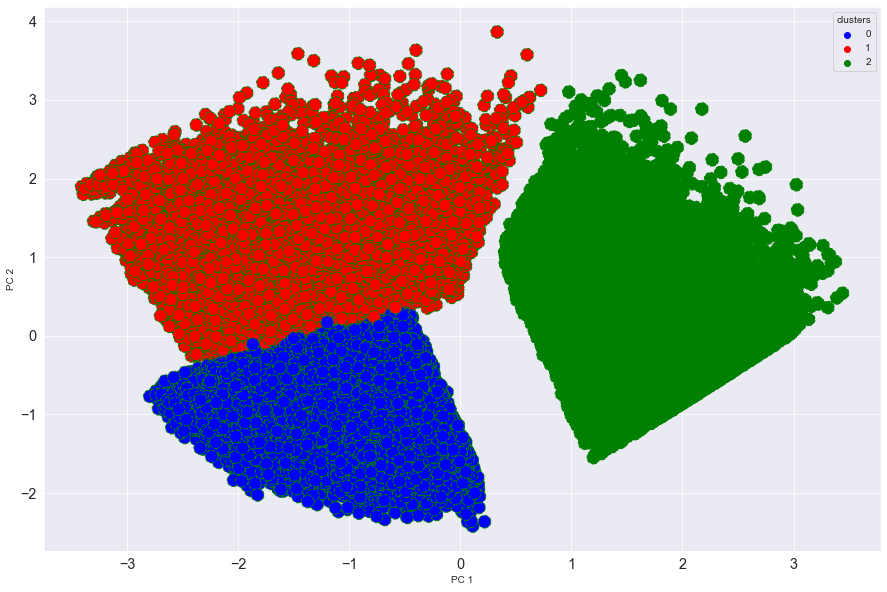

In [159]:
fig, ax = plt.subplots(figsize=(15,10))

sns.scatterplot(
    x="PC 1", y="PC 2",
    hue="clusters",
    edgecolor='green',
    linestyle='--',
    data=data_pca,
    palette=['blue','red','green'],
    s=160,
    ax=ax
);

# 6. Interpretation

## a. Clusters Statistical Feature

In [156]:
df_clustersegment = df0.groupby('Cluster').agg(['count', 'mean','median', 'min', 'max']).reset_index()

df_clustersegment

Cluster LAST_TO_END                             FLIGHT_COUNT             \
                count        mean median min  max        count       mean   
0       0       15684  195.317394  143.0  23  714        15684  11.325618   
1       1       11372   18.124516   15.0   1  106        11372  16.604467   
2       2       20185  314.958583  292.0   2  721        20185   3.779242   

                 SUM_YR_1                                       
  median min max    count         mean  median    min      max  
0   10.0   2  34    15684  6356.598062  5546.0  746.0  16326.0  
1   16.0   2  34    11372  5677.395181  4800.5  108.0  16319.0  
2    3.0   2  25    20185  1803.629294  1578.0  108.0   9138.0

## b. Customer Segmentation

**Cluster 0**: 
* Total populasi 15,684(33%)
* Penerbangan rata-rata 11 kali 
* Rata-rata total spending 6,357 dolar
* Jarak waktu penerbangan terakhir ke pesanan penerbangan terakhir yaitu 195 hari.</br>

**Cluster 1**: 
* Total populasi 11,372(24%) 
* Penerbangan rata-rata 16 kali 
* Rata-rata total spending 5,677 dolar
* Jarak waktu penerbangan terakhir ke pesanan penerbangan terakhir yaitu 18 hari.</br>

**Cluster 2**: 
* Total populasi 20,185(43%)
* Penerbangan rata-rata 3-4 kali
* Rata-rata total spending 1,804 dolar
* Jarak waktu penerbangan terakhir ke pesanan penerbangan terakhir yaitu 315 hari.</br>

## c. Business Insight

1. Cluster 1 adalah cluster yang sering memakai airlane(Loyal), jadi perlu perhatian khusus untuk cluster tersebut tetap loyal memakai jasa airlane. Mungkin dengan **promo atau cashback** karena mereka lebih **suka harga yang murah**
2. Cluster 0 adalah cluster yang total spendingnya paling tinggi. Mereka **tidak terlalu peduli dengan harga**. **Tingkatkan kualitas pelayanan** untuk customer di cluster 0.